In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
df = pd.read_csv("hr_train.csv")

In [3]:
df

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,3030,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,0,78,0
54804,74592,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,0,56,0
54805,13918,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,1,0,79,0
54806,13614,Sales & Marketing,region_9,NaN,m,sourcing,1,29,1.0,2,0,0,45,0


<AxesSubplot:ylabel='is_promoted'>

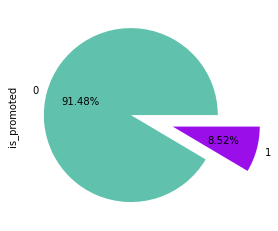

In [4]:
colour=['#60C2AC',"#9A0EEA"]
df["is_promoted"].value_counts().plot.pie(explode=[0,.50], autopct='%1.2f%%',colors=colour)

<AxesSubplot:>

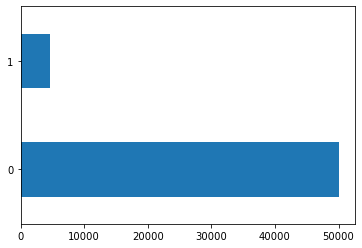

In [5]:
colour=['#60C2AC',"#9A0EEA"]
df["is_promoted"].value_counts().plot(kind='barh')

C:\Users\abhishek bablani\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


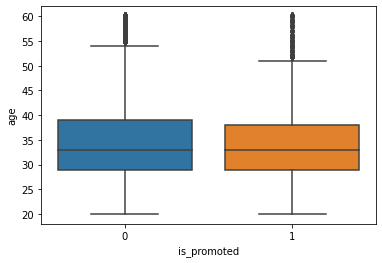

In [6]:
box=sns.boxplot("is_promoted","age",data=df)


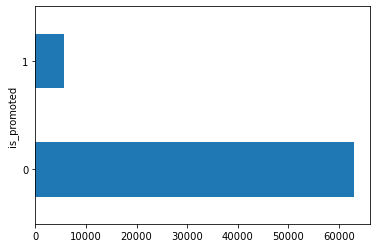

In [7]:
total_p=df.groupby("is_promoted")["no_of_trainings"].sum().plot(kind='barh')

In [225]:
df[["previous_year_rating","awards_won?"]]=df[["previous_year_rating","awards_won?"]].astype(object)

In [226]:
df["education"].fillna(df["education"].mode()[0],inplace=True)
df["previous_year_rating"].fillna(df["previous_year_rating"].mode()[0],inplace=True)

In [227]:
df.isna().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

In [228]:
X=df.drop(["is_promoted"],axis=1)
y=df[["is_promoted"]]

In [229]:
X.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73


In [230]:
from sklearn.preprocessing import LabelEncoder

In [231]:
le = LabelEncoder()
  
X['gender']= le.fit_transform(X['gender'])

In [232]:
X.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,65438,Sales & Marketing,region_7,Master's & above,0,sourcing,1,35,5.0,8,1,0,49
1,65141,Operations,region_22,Bachelor's,1,other,1,30,5.0,4,0,0,60
2,7513,Sales & Marketing,region_19,Bachelor's,1,sourcing,1,34,3.0,7,0,0,50
3,2542,Sales & Marketing,region_23,Bachelor's,1,other,2,39,1.0,10,0,0,50
4,48945,Technology,region_26,Bachelor's,1,other,1,45,3.0,2,0,0,73


In [233]:
X["education"].value_counts()

Bachelor's          39078
Master's & above    14925
Below Secondary       805
Name: education, dtype: int64

In [234]:
edu_dict={"Below Secondary":0,"Bachelor's":1,"Master's & above":2}

In [235]:

X["education"]=X["education"].map(edu_dict)

In [236]:
X.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,65438,Sales & Marketing,region_7,2,0,sourcing,1,35,5.0,8,1,0,49
1,65141,Operations,region_22,1,1,other,1,30,5.0,4,0,0,60
2,7513,Sales & Marketing,region_19,1,1,sourcing,1,34,3.0,7,0,0,50
3,2542,Sales & Marketing,region_23,1,1,other,2,39,1.0,10,0,0,50
4,48945,Technology,region_26,1,1,other,1,45,3.0,2,0,0,73


In [237]:
X=pd.get_dummies(X)

In [238]:
X.drop(["employee_id"],axis=1,inplace=True)

In [239]:
X.head()

,education,gender,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,avg_training_score,department_Analytics,department_Finance,...,region_region_5,region_region_6,region_region_7,region_region_8,region_region_9,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing,awards_won?_0,awards_won?_1
0,2,0,1,35,5.0,8,1,49,0,0,...,0,0,1,0,0,0,0,1,1,0
1,1,1,1,30,5.0,4,0,60,0,0,...,0,0,0,0,0,1,0,0,1,0
2,1,1,1,34,3.0,7,0,50,0,0,...,0,0,0,0,0,0,0,1,1,0
3,1,1,2,39,1.0,10,0,50,0,0,...,0,0,0,0,0,1,0,0,1,0
4,1,1,1,45,3.0,2,0,73,0,0,...,0,0,0,0,0,1,0,0,1,0


In [240]:
X.drop(["recruitment_channel_sourcing","region_region_9","awards_won?_1"],axis=1,inplace=True)

In [241]:
X.shape

(54808, 53)

In [242]:
X.head()

,education,gender,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,avg_training_score,department_Analytics,department_Finance,...,region_region_33,region_region_34,region_region_4,region_region_5,region_region_6,region_region_7,region_region_8,recruitment_channel_other,recruitment_channel_referred,awards_won?_0
0,2,0,1,35,5.0,8,1,49,0,0,...,0,0,0,0,0,1,0,0,0,1
1,1,1,1,30,5.0,4,0,60,0,0,...,0,0,0,0,0,0,0,1,0,1
2,1,1,1,34,3.0,7,0,50,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1,1,2,39,1.0,10,0,50,0,0,...,0,0,0,0,0,0,0,1,0,1
4,1,1,1,45,3.0,2,0,73,0,0,...,0,0,0,0,0,0,0,1,0,1


In [243]:
y.head()

,is_promoted
0,0
1,0
2,0
3,0
4,0


In [267]:
test=pd.read_csv("hr_test.csv")

In [268]:
test.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


In [269]:
test[["previous_year_rating","awards_won?"]]=test[["previous_year_rating","awards_won?"]].astype(object)

In [270]:
test["education"].fillna(df["education"].mode()[0],inplace=True)
test["previous_year_rating"].fillna(df["previous_year_rating"].mode()[0],inplace=True)

In [271]:
test['gender']= le.fit_transform(test['gender'])

In [272]:

test["education"]=test["education"].map(edu_dict)

In [273]:
test=pd.get_dummies(test)

In [274]:
test.shape

(23490, 57)

In [275]:
test.head()

,employee_id,education,gender,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,avg_training_score,department_Analytics,...,region_region_5,region_region_6,region_region_7,region_region_8,region_region_9,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing,awards_won?_0,awards_won?_1
0,8724,1,1,1,24,3.0,1,1,77,0,...,0,0,0,0,0,0,0,1,1,0
1,74430,1,0,1,31,3.0,5,0,51,0,...,0,0,0,0,0,1,0,0,1,0
2,72255,1,1,1,31,1.0,4,0,47,0,...,0,0,0,0,0,1,0,0,1,0
3,38562,1,0,3,31,2.0,9,0,65,0,...,0,0,0,0,0,1,0,0,1,0
4,64486,1,1,1,30,4.0,7,0,61,0,...,0,0,0,0,0,0,0,1,1,0


In [276]:
test.drop(["recruitment_channel_sourcing","region_region_9","awards_won?_1"],axis=1,inplace=True)

In [277]:
test.shape

(23490, 54)

In [279]:
test=pd.merge(test,sample)

In [280]:
test

,employee_id,education,gender,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,avg_training_score,department_Analytics,...,region_region_34,region_region_4,region_region_5,region_region_6,region_region_7,region_region_8,recruitment_channel_other,recruitment_channel_referred,awards_won?_0,is_promoted
0,8724,1,1,1,24,3.0,1,1,77,0,...,0,0,0,0,0,0,0,0,1,0
1,74430,1,0,1,31,3.0,5,0,51,0,...,0,1,0,0,0,0,1,0,1,0
2,72255,1,1,1,31,1.0,4,0,47,0,...,0,0,0,0,0,0,1,0,1,0
3,38562,1,0,3,31,2.0,9,0,65,0,...,0,0,0,0,0,0,1,0,1,0
4,64486,1,1,1,30,4.0,7,0,61,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23485,53478,0,1,1,24,3.0,1,0,61,0,...,0,0,0,0,0,0,0,0,1,0
23486,25600,1,1,1,31,3.0,7,0,74,0,...,0,0,0,0,0,0,0,0,1,0
23487,45409,1,0,1,26,4.0,4,0,50,0,...,0,0,0,0,0,0,0,0,1,0
23488,1186,1,1,3,27,3.0,1,0,70,0,...,0,0,0,0,0,0,0,0,1,0


In [321]:
test_X=test.drop(["is_promoted","employee_id"],axis=1)

In [322]:
test_X.shape

(23490, 53)

In [287]:
test_y=test[["is_promoted"]]

In [288]:
from sklearn.model_selection import train_test_split

In [289]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.7,random_state=42)

In [290]:
from imblearn.combine import SMOTETomek

In [291]:
os=SMOTETomek()

In [292]:
X_res, y_res = os.fit_resample(X_train, y_train)

In [293]:
type(y_res)

pandas.core.frame.DataFrame

In [294]:
a=y_res.to_numpy()

In [295]:
type(a)

numpy.ndarray

In [296]:
len(y_res)

29942

In [298]:
y_res=a.reshape(29942,)

In [299]:
from sklearn.model_selection import RandomizedSearchCV

In [300]:
from sklearn.linear_model import LogisticRegression

In [301]:
lr=LogisticRegression()

In [302]:
param_grid = [    
    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 5000]
    }
]

In [303]:
rfr_random = RandomizedSearchCV(estimator=lr, param_distributions=param_grid, n_iter = 20, cv = 3, verbose=2, random_state=42, n_jobs=-1)

In [304]:
rfr_random.fit(X_res,y_res)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


C:\Users\abhishek bablani\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [0.87803179        nan 0.74607608 0.90762252        nan 0.90632004
        nan        nan 0.9077561         nan        nan        nan
 0.88290793 0.90745553 0.90094293 0.65970886        nan 0.90625325
 0.82472843        nan]
  warnings.warn(
C:\Users\abhishek bablani\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


RandomizedSearchCV(cv=3, estimator=LogisticRegression(), n_iter=20, n_jobs=-1,
                   param_distributions=[{'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                         'max_iter': [100, 1000, 2500, 5000],
                                         'penalty': ['l1', 'l2', 'elasticnet',
                                                     'none'],
                                         'solver': ['lbfgs', 'newton-cg',
                                                    'liblinear', 'sag',
                                                    'saga']}],
                   random_state=42, verbose=2)

In [305]:
rfr_random.best_estimator_

LogisticRegression(C=0.012742749857031334, max_iter=5000, penalty='none',
                   solver='sag')

In [306]:
rfr_random.best_score_

0.9077560959677764

In [307]:
lr=LogisticRegression(C=0.012742749857031334, max_iter=5000, penalty='none',
                   solver='sag')

In [308]:
# Train logistic Classifer
lr = lr.fit(X_res,y_res)
#Predict the response for train dataset
y_pred_train = lr.predict(X_res)
#Predict the response for test dataset
y_pred = lr.predict(X_test)

C:\Users\abhishek bablani\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


In [309]:
from sklearn.metrics import classification_report

In [310]:
print(classification_report(y_res, y_pred_train))#train data

              precision    recall  f1-score   support

           0       0.89      0.95      0.92     14971
           1       0.95      0.88      0.91     14971

    accuracy                           0.92     29942
   macro avg       0.92      0.92      0.92     29942
weighted avg       0.92      0.92      0.92     29942



In [312]:
print(classification_report(y_test, y_pred))# test data

              precision    recall  f1-score   support

           0       0.94      0.95      0.95     35152
           1       0.41      0.36      0.38      3214

    accuracy                           0.90     38366
   macro avg       0.67      0.65      0.66     38366
weighted avg       0.90      0.90      0.90     38366



In [324]:
test_ypred = lr.predict(test_X)
print(classification_report(test_y, test_ypred))# test data

              precision    recall  f1-score   support

           0       1.00      0.93      0.96     23490
           1       0.00      0.00      0.00         0

    accuracy                           0.93     23490
   macro avg       0.50      0.46      0.48     23490
weighted avg       1.00      0.93      0.96     23490



C:\Users\abhishek bablani\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\abhishek bablani\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\abhishek bablani\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [327]:
d=pd.DataFrame({"y":test_ypred})

In [330]:
d["y"].value_counts()

0    21734
1     1756
Name: y, dtype: int64

In [331]:
from sklearn.ensemble import RandomForestClassifier

In [332]:
rf=RandomForestClassifier()

In [333]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

In [335]:
rfr_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid, n_iter = 20, cv = 3, verbose=2, random_state=42, n_jobs=-1)

In [336]:
rfr_random.fit(X_res,y_res)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=20,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [338]:
rfr_random.best_estimator_

RandomForestClassifier(bootstrap=False, max_depth=80, min_samples_split=10,
                       n_estimators=1000)

In [339]:
rfr_random.best_score_

0.9497370722475577

In [340]:
rf=RandomForestClassifier(bootstrap=False, max_depth=80, min_samples_split=10,
                       n_estimators=1000)

In [341]:
# Train RandomForestClassifier Classifer
rf = rf.fit(X_res,y_res)
#Predict the response for train dataset
y_pred_train = rf.predict(X_res)
#Predict the response for test dataset
y_pred = rf.predict(X_test)

In [342]:
print(classification_report(y_res, y_pred_train))# train data

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     14971
           1       1.00      0.98      0.99     14971

    accuracy                           0.99     29942
   macro avg       0.99      0.99      0.99     29942
weighted avg       0.99      0.99      0.99     29942



In [343]:
print(classification_report(y_test, y_pred))# test data

              precision    recall  f1-score   support

           0       0.94      0.98      0.96     35152
           1       0.58      0.33      0.42      3214

    accuracy                           0.92     38366
   macro avg       0.76      0.65      0.69     38366
weighted avg       0.91      0.92      0.91     38366



In [345]:
test_ypred=rf.predict(test_X)
print(classification_report(y_test, y_pred))# test data

              precision    recall  f1-score   support

           0       0.94      0.98      0.96     35152
           1       0.58      0.33      0.42      3214

    accuracy                           0.92     38366
   macro avg       0.76      0.65      0.69     38366
weighted avg       0.91      0.92      0.91     38366



In [346]:
from xgboost import XGBClassifier

In [347]:
xgb=XGBClassifier()

In [348]:
parameters = {
    'max_depth': range (2, 10, 1),
    'n_estimators': range(60, 220, 40),
    'learning_rate': [0.1, 0.01, 0.05]
}

In [349]:
rfr_random = RandomizedSearchCV(estimator=xgb, param_distributions=parameters, n_iter = 20, cv = 3, verbose=2, random_state=42, n_jobs=-1)

In [350]:
rfr_random.fit(X_res,y_res)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


C:\Users\abhishek bablani\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:30:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=None, reg_alpha=None,
                          

In [351]:
rfr_random.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=9,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=180, n_jobs=12, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [352]:
rfr_random.best_score_

0.9460632683729012

In [353]:
xgb=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=5,
              min_child_weight=1, min_samples_leaf=2, min_samples_split=5,
               monotone_constraints='()', n_estimators=100,
              n_jobs=12, num_parallel_tree=1, random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [354]:
# Train XGBClassifier Classifer
xgb = xgb.fit(X_res,y_res)
#Predict the response for train dataset
y_pred_train = xgb.predict(X_res)
#Predict the response for test dataset
y_pred = xgb.predict(X_test)

[15:30:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "min_samples_leaf", "min_samples_split" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:30:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [355]:
print(classification_report(y_res, y_pred_train))# train data

              precision    recall  f1-score   support

           0       0.95      0.98      0.96     14971
           1       0.98      0.95      0.96     14971

    accuracy                           0.96     29942
   macro avg       0.96      0.96      0.96     29942
weighted avg       0.96      0.96      0.96     29942



In [356]:
print(classification_report(y_test, y_pred))# test data

              precision    recall  f1-score   support

           0       0.95      0.97      0.96     35152
           1       0.54      0.41      0.47      3214

    accuracy                           0.92     38366
   macro avg       0.74      0.69      0.71     38366
weighted avg       0.91      0.92      0.92     38366



In [357]:
test_ypred=xgb.predict(test_X)
print(classification_report(y_test, y_pred))# test data

              precision    recall  f1-score   support

           0       0.95      0.97      0.96     35152
           1       0.54      0.41      0.47      3214

    accuracy                           0.92     38366
   macro avg       0.74      0.69      0.71     38366
weighted avg       0.91      0.92      0.92     38366



In [359]:
from catboost import CatBoostClassifier
from sklearn.model_selection import GridSearchCV

In [360]:
model = CatBoostClassifier(iterations=100)

In [361]:


# fit the model with the training data
model.fit(X_res,y_res,plot=False)

Learning rate set to 0.363334
0:	learn: 0.5137799	total: 11.9ms	remaining: 1.18s
1:	learn: 0.4286250	total: 21ms	remaining: 1.03s
2:	learn: 0.3790304	total: 29.8ms	remaining: 962ms
3:	learn: 0.3396297	total: 38.3ms	remaining: 920ms
4:	learn: 0.3263301	total: 46.6ms	remaining: 886ms
5:	learn: 0.3130348	total: 54.4ms	remaining: 852ms
6:	learn: 0.3010819	total: 62.2ms	remaining: 826ms
7:	learn: 0.2920513	total: 69.8ms	remaining: 803ms
8:	learn: 0.2773975	total: 77.4ms	remaining: 783ms
9:	learn: 0.2695325	total: 85.1ms	remaining: 766ms
10:	learn: 0.2635915	total: 92.8ms	remaining: 751ms
11:	learn: 0.2562303	total: 100ms	remaining: 735ms
12:	learn: 0.2505062	total: 108ms	remaining: 721ms
13:	learn: 0.2435193	total: 115ms	remaining: 708ms
14:	learn: 0.2376184	total: 123ms	remaining: 694ms
15:	learn: 0.2331229	total: 130ms	remaining: 682ms
16:	learn: 0.2295650	total: 138ms	remaining: 672ms
17:	learn: 0.2259387	total: 145ms	remaining: 661ms
18:	learn: 0.2223163	total: 153ms	remaining: 653ms
19

In [362]:
print(classification_report(y_res, y_pred_train))# train data

              precision    recall  f1-score   support

           0       0.95      0.98      0.96     14971
           1       0.98      0.95      0.96     14971

    accuracy                           0.96     29942
   macro avg       0.96      0.96      0.96     29942
weighted avg       0.96      0.96      0.96     29942



In [363]:
print(classification_report(y_test, y_pred))# test data

              precision    recall  f1-score   support

           0       0.95      0.97      0.96     35152
           1       0.54      0.41      0.47      3214

    accuracy                           0.92     38366
   macro avg       0.74      0.69      0.71     38366
weighted avg       0.91      0.92      0.92     38366



In [364]:
test_ypred=model.predict(test_X)
print(classification_report(y_test, y_pred))# test data

              precision    recall  f1-score   support

           0       0.95      0.97      0.96     35152
           1       0.54      0.41      0.47      3214

    accuracy                           0.92     38366
   macro avg       0.74      0.69      0.71     38366
weighted avg       0.91      0.92      0.92     38366



In [365]:
from sklearn.ensemble import VotingClassifier

In [366]:
LogReg_clf = LogisticRegression(C=0.012742749857031334, max_iter=5000, penalty='none',
                   solver='sag')

DTree_rf = RandomForestClassifier(bootstrap=False, max_depth=80, min_samples_split=10,
                       n_estimators=1000)
xgb=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=5,
              min_child_weight=1, min_samples_leaf=2, min_samples_split=5,
               monotone_constraints='()', n_estimators=100,
              n_jobs=12, num_parallel_tree=1, random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)
model = CatBoostClassifier(iterations=100)

In [367]:
type(y_res)

numpy.ndarray

In [368]:
y_res.shape

(29942,)

In [374]:
voting_clf = VotingClassifier(estimators=[("xgb",xgb),('LogReg', LogReg_clf),("DTree_rf",DTree_rf) ,("model",model)], voting='soft')


In [375]:
voting_clf.fit(X_res,y_res)


C:\Users\abhishek bablani\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:36:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "min_samples_leaf", "min_samples_split" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:36:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\abhishek bablani\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


Learning rate set to 0.363334
0:	learn: 0.5137799	total: 8.68ms	remaining: 860ms
1:	learn: 0.4286250	total: 16.9ms	remaining: 829ms
2:	learn: 0.3790304	total: 25.3ms	remaining: 819ms
3:	learn: 0.3396297	total: 33.6ms	remaining: 806ms
4:	learn: 0.3263301	total: 41.7ms	remaining: 792ms
5:	learn: 0.3130348	total: 49.9ms	remaining: 782ms
6:	learn: 0.3010819	total: 57.6ms	remaining: 766ms
7:	learn: 0.2920513	total: 65.6ms	remaining: 754ms
8:	learn: 0.2773975	total: 73.5ms	remaining: 743ms
9:	learn: 0.2695325	total: 81.5ms	remaining: 733ms
10:	learn: 0.2635915	total: 89.5ms	remaining: 724ms
11:	learn: 0.2562303	total: 97.3ms	remaining: 713ms
12:	learn: 0.2505062	total: 105ms	remaining: 701ms
13:	learn: 0.2435193	total: 112ms	remaining: 689ms
14:	learn: 0.2376184	total: 120ms	remaining: 677ms
15:	learn: 0.2331229	total: 127ms	remaining: 666ms
16:	learn: 0.2295650	total: 134ms	remaining: 656ms
17:	learn: 0.2259387	total: 142ms	remaining: 646ms
18:	learn: 0.2223163	total: 149ms	remaining: 637ms

VotingClassifier(estimators=[('xgb',
                              XGBClassifier(base_score=0.5, booster='gbtree',
                                            colsample_bylevel=1,
                                            colsample_bynode=1,
                                            colsample_bytree=1, gamma=0,
                                            gpu_id=-1, importance_type='gain',
                                            interaction_constraints='',
                                            learning_rate=0.300000012,
                                            max_delta_step=0, max_depth=5,
                                            min_child_weight=1,
                                            min_samples_leaf=2,
                                            min_samples_split=5, missing=nan,
                                            monotone_constrai...
                                            scale_pos_weight=1, subsample=1,
                                      

In [376]:
#Predict the response for train dataset
y_pred_train = voting_clf.predict(X_res)
#Predict the response for test dataset
y_pred = voting_clf.predict(X_test)

In [377]:
print(classification_report(y_res, y_pred_train))# train data

              precision    recall  f1-score   support

           0       0.95      0.99      0.97     14971
           1       0.99      0.95      0.97     14971

    accuracy                           0.97     29942
   macro avg       0.97      0.97      0.97     29942
weighted avg       0.97      0.97      0.97     29942



In [378]:
print(classification_report(y_test, y_pred))# test data

              precision    recall  f1-score   support

           0       0.95      0.98      0.96     35152
           1       0.63      0.39      0.48      3214

    accuracy                           0.93     38366
   macro avg       0.79      0.68      0.72     38366
weighted avg       0.92      0.93      0.92     38366



In [382]:
test_ypred=voting_clf.predict(test_X)
print(classification_report(y_test, y_pred))# test data

              precision    recall  f1-score   support

           0       0.95      0.98      0.96     35152
           1       0.63      0.39      0.48      3214

    accuracy                           0.93     38366
   macro avg       0.79      0.68      0.72     38366
weighted avg       0.92      0.93      0.92     38366



In [392]:
employee_id=pd.read_csv("hr_test.csv")

In [393]:
employee_id["education"].fillna(df["education"].mode()[0],inplace=True)
employee_id["previous_year_rating"].fillna(df["previous_year_rating"].mode()[0],inplace=True)

In [398]:
df1=pd.DataFrame({"employee_id":employee_id["employee_id"],"is_promoted":test_ypred})

In [395]:
df1=pd.merge(df1,employee_id)

In [396]:
df1

,employee_id,is_promoted,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,0,Technology,region_26,Bachelor's,m,sourcing,1,24,3.0,1,1,0,77
1,74430,0,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,0,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,0,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,0,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23485,53478,0,Legal,region_2,Below Secondary,m,sourcing,1,24,3.0,1,0,0,61
23486,25600,0,Technology,region_25,Bachelor's,m,sourcing,1,31,3.0,7,0,0,74
23487,45409,0,HR,region_16,Bachelor's,f,sourcing,1,26,4.0,4,0,0,50
23488,1186,0,Procurement,region_31,Bachelor's,m,sourcing,3,27,3.0,1,0,0,70


In [399]:
df1.to_csv('file1.csv')